In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("data_reduce_filled.xlsx")

In [3]:
# Polllution variables

pollution = [
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]',
    'Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]',
    'Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]',

    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
    'Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]',
    'Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]',

    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]',

    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]',

    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]',

    'Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE]',
    'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE]',

    'Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE]',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE]',

    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]',
    'Carbon intensity of electricity (gCO2/kWh)'
]

In [4]:
pollution_data = data[pollution]

In [5]:
pollution_data

,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD],Carbon intensity of electricity (gCO2/kWh)
0,30.900,13.8500,81.600,96.616135,95.586174,99.626022,17.96,27690.000534,0.080291,10540.0,4310.0,15909.999847,4690.0,2.4400,136.752140
1,79.800,62.5000,92.200,100.000000,100.000000,100.000000,38.11,9449.999809,0.133868,2010.0,960.0,3009.999990,1080.0,2.5700,24.561401
2,99.600,98.7000,100.000,99.697838,99.071304,99.933952,0.19,278029.998779,0.336716,6820.0,5530.0,94400.001526,12510.0,5.1900,488.975200
3,81.168,59.2630,93.575,84.048066,73.536247,94.733865,0.49,243760.104065,0.550819,23820.4,13235.3,79695.899973,14129.8,9.6246,687.500000
4,49.100,8.1000,77.700,45.290001,7.333445,65.269997,57.36,75239.997864,0.111381,16220.0,16140.0,34000.000000,16840.0,2.9500,137.850460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.394,32.2690,78.416,100.000000,100.000000,100.000000,3.43,226545.302620,0.161743,33739.7,22010.8,52611.999569,25127.6,2.3288,688.524540
196,45.157,18.7335,70.111,100.000000,100.000000,100.000000,12.73,40982.100382,0.177872,23361.5,12688.5,26220.099993,13449.0,2.5500,524.999940
197,61.500,42.9000,93.700,62.000000,37.545254,87.139853,3.60,23860.000610,0.248813,4360.0,2980.0,10619.999886,3080.0,3.7545,542.424260
198,11.900,2.1000,24.600,40.317890,12.466436,76.461876,82.28,37560.001373,0.126504,10330.0,13510.0,15250.000000,13990.0,7.3500,130.192200


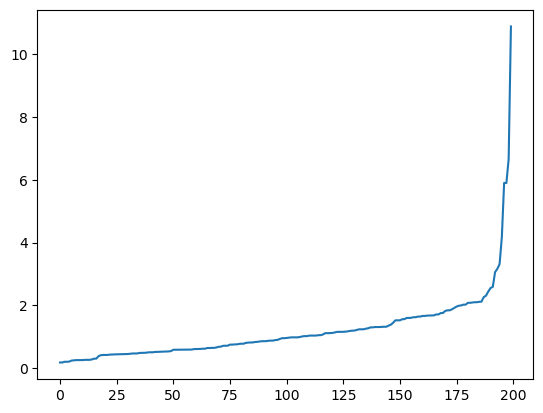

In [6]:
# standardization + KNN to find eps for DBSCAN

df = StandardScaler().fit_transform(pollution_data)

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [7]:
# dbscan outliers
fit = DBSCAN(eps=3, min_samples=7).fit(df)
outliers_ = pd.DataFrame(df) 
outliers = outliers_[fit.labels_== -1]
print(Counter(fit.labels_))


Counter({0: 191, -1: 9})


In [8]:
outliers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
24,0.848870,0.572930,0.728228,0.597351,0.604467,0.484867,0.611421,0.781740,-0.519562,5.986217,4.459137,3.118092,3.318771,-0.261260,-1.394965
38,0.301824,0.097174,0.387647,0.609392,0.653361,0.491371,-0.582847,11.942127,2.432925,5.974851,9.516533,9.148669,10.807978,0.658286,0.721486
84,-0.126064,-0.315147,0.417787,0.436814,0.467095,0.432836,0.103749,3.069917,0.624966,9.246931,6.091934,5.004274,5.036372,-0.085575,1.106510
97,-1.466598,-1.317894,-1.767352,-1.492402,-0.576498,-3.410941,-0.601530,-0.168873,-0.267438,-0.308288,-0.329081,-0.221964,-0.282426,-0.326563,-1.264515
148,0.670132,0.855944,0.517249,0.609392,0.653361,0.491371,-0.961175,2.122890,1.845253,0.607879,0.936576,5.131980,0.915520,1.353554,-0.214099
163,-1.745538,-1.342292,-2.246576,-3.156280,-2.279426,-5.213315,-0.046073,-0.184650,-0.292456,0.140163,0.297934,-0.101567,0.141557,-0.388913,1.300404
180,0.962613,1.097481,0.767409,0.609392,0.653361,0.491371,-1.059261,-0.212618,2.165761,-0.375517,-0.361057,-0.311727,-0.321472,5.498991,0.470801
183,0.959904,1.095041,0.767409,0.609392,0.653361,0.491371,-1.073273,-0.089257,5.325250,-0.249535,-0.287222,0.272105,-0.259326,3.252456,0.582448
189,0.962613,1.097481,0.767409,0.609392,0.653361,0.491371,-0.711831,5.739460,0.372944,3.521466,4.911739,5.456623,5.133680,-0.007077,-0.042356


In [9]:
for e in outliers.index:
    print(data.loc[[e]]['Country Name'])

24    Brazil
Name: Country Name, dtype: object
38    China
Name: Country Name, dtype: object
84    India
Name: Country Name, dtype: object
97    Korea, Dem. People's Rep.
Name: Country Name, dtype: object
148    Russian Federation
Name: Country Name, dtype: object
163    South Sudan
Name: Country Name, dtype: object
180    Trinidad and Tobago
Name: Country Name, dtype: object
183    Turkmenistan
Name: Country Name, dtype: object
189    United States
Name: Country Name, dtype: object


In [10]:
# Economic variables
economics = [
    'Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]',
    'Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]',
    'Exports of goods and services (current US$) [NE.EXP.GNFS.CD]',
    'Imports of goods and services (current US$) [NE.IMP.GNFS.CD]',
    'Final consumption expenditure (current US$) [NE.CON.TOTL.CD]',
    'GDP, PPP (constant 2017 international $) [NY.GDP.MKTP.PP.KD]',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
    'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
    'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]',
    'Population, total [SP.POP.TOTL]',
    'Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]'
]

In [11]:
econ_data = data[economics]

In [12]:
econ_data

,"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]","Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]",Exports of goods and services (current US$) [NE.EXP.GNFS.CD],Imports of goods and services (current US$) [NE.IMP.GNFS.CD],Final consumption expenditure (current US$) [NE.CON.TOTL.CD],"GDP, PPP (constant 2017 international $) [NY.GDP.MKTP.PP.KD]",GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]","Population, total [SP.POP.TOTL]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]"
0,4.551607,2.7200,1.062330e+11,1.119149e+11,1.921012e+11,7.560042e+10,1.189228,7.821093e+10,13.387247,36686784,17.660000
1,21.817345,3.2900,4.785178e+09,6.856193e+09,1.370054e+10,3.817186e+10,4.019360,3.864383e+10,21.279306,2866376,44.520000
2,8.843219,4.6300,4.523397e+10,5.632890e+10,1.036736e+11,4.916310e+11,1.200000,4.907023e+11,38.805186,41927007,68.019997
3,8.952935,2.5561,4.360000e+08,6.620000e+08,1.677895e+10,9.545896e+11,2.671119,9.707024e+11,25.338415,48424,58.927900
4,4.932187,5.2600,3.176775e+10,1.986966e+10,5.199370e+10,2.151179e+11,-1.316312,2.032423e+11,47.931542,31273533,21.620001
...,...,...,...,...,...,...,...,...,...,...,...
195,30.358141,3.3600,2.084000e+09,4.163000e+09,4.352000e+09,9.472831e+11,1.904762,9.697226e+11,13.940961,107001,93.419998
196,5.807014,7.0800,2.598000e+09,9.023700e+09,1.804750e+10,2.886845e+10,1.227077,3.461983e+10,19.284126,4569087,69.739998
197,4.865355,7.0700,1.308592e+09,9.344000e+09,3.643334e+10,8.711139e+11,0.752448,9.142263e+11,15.209188,30790513,45.299999
198,3.147726,0.2500,9.987197e+09,9.717124e+09,1.517567e+10,6.110486e+10,4.034494,6.159734e+10,34.485322,17835893,24.860001


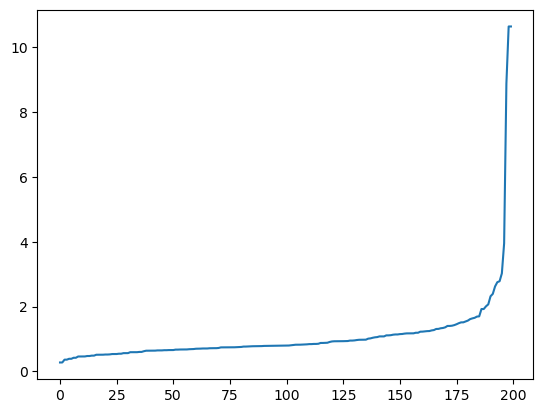

In [13]:
df2 = StandardScaler().fit_transform(econ_data)
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df2)
distances, indices = neighbors_fit.kneighbors(df2)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [15]:
fit = DBSCAN(eps=3, min_samples=7).fit(df2)
outliers2_ = pd.DataFrame(df2) 
outliers2 = outliers2_[fit.labels_== -1]
print(Counter(fit.labels_))

Counter({0: 195, -1: 5})


In [16]:
outliers2

,0,1,2,3,4,5,6,7,8,9,10
38,0.300861,-0.476194,7.618682,7.112761,5.364911,9.175281,1.361214,9.077274,1.278851,9.544204,-0.241187
69,2.074525,0.534720,5.274490,4.402542,1.853931,1.669549,-0.919134,1.742850,0.159874,0.312843,1.115420
84,-0.440541,-0.518512,1.218097,1.483362,1.145878,3.627048,1.244234,3.563368,0.079058,9.308102,-1.409135
92,3.774106,-0.560829,2.380927,2.308333,2.503812,2.055218,-1.076136,2.097818,0.311118,0.619926,1.100645
189,1.050979,-0.391560,7.263414,8.772083,12.052015,8.649870,-0.142690,8.776219,-0.624210,2.018962,1.252558


In [17]:
for e in outliers2.index:
    print(data.loc[[e]]['Country Name'])

38    China
Name: Country Name, dtype: object
69    Germany
Name: Country Name, dtype: object
84    India
Name: Country Name, dtype: object
92    Japan
Name: Country Name, dtype: object
189    United States
Name: Country Name, dtype: object


In [24]:
# tentativo mappa

In [25]:
import worldmap as worldmap

In [26]:
names   = ['zeeland','Overijssel', 'flevoland']
opacity = [0.1, 0.2, 0.6]
cmap    = ['#ff0000'] # Different red accents
out = worldmap.colormap(names,opacity=opacity, cmap='Set1', loadmap='netherlands', filename='nederlandMap.svg')

AttributeError: module 'worldmap' has no attribute 'colormap'

In [27]:
#### Coloring of maps   
names   = ['Nederland']
opacity = [100]
out = worldmap.colormap(names, opacity=opacity, loadmap='world')

AttributeError: module 'worldmap' has no attribute 'colormap'

In [ ]:
# le mappette
# https://pygal.org/en/stable/documentation/types/maps/pygal_maps_world.html

In [28]:
import pygal


AttributeError: module 'pygal.maps' has no attribute 'world'

In [30]:
worldmap_chart = pygal.maps.World()
worldmap_chart.title = 'Some countries'
worldmap_chart.add('F countries', ['fr', 'fi'])
worldmap_chart.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
                                   'mk', 'ml', 'mm', 'mn', 'mo',
                                   'mr', 'mt', 'mu', 'mv', 'mw',
                                   'mx', 'my', 'mz'])
worldmap_chart.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])
worldmap_chart.render()

AttributeError: module 'pygal.maps' has no attribute 'World'

In [31]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Minimum deaths by capital punishement (source: Amnesty International)'
worldmap_chart.add('In 2012', {
  'af': 14,
  'bd': 1,
  'by': 3,
  'cn': 1000,
  'gm': 9,
  'in': 1,
  'ir': 314,
  'iq': 129,
  'jp': 7,
  'kp': 6,
  'pk': 1,
  'ps': 6,
  'sa': 79,
  'so': 6,
  'sd': 5,
  'tw': 6,
  'ae': 1,
  'us': 43,
  'ye': 28
})
worldmap_chart.render()

AttributeError: module 'pygal.maps' has no attribute 'world'

In [37]:
worldmap_chart = pygal.maps()
worldmap_chart.title = 'Some countries'
worldmap_chart.add('F countries', ['fr', 'fi'])
worldmap_chart.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
                                   'mk', 'ml', 'mm', 'mn', 'mo',
                                   'mr', 'mt', 'mu', 'mv', 'mw',
                                   'mx', 'my', 'mz'])
worldmap_chart.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])
worldmap_chart.render()

TypeError: 'module' object is not callable

In [35]:
pygal.maps


<module 'pygal.maps' from 'C:\\Users\\isabe\\anaconda3\\lib\\site-packages\\pygal\\maps\\__init__.py'>

In [38]:
# https://geopandas.org/en/stable/docs/user_guide/mapping.html